In [1]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../my_modules'))

# print(sys.path)

import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


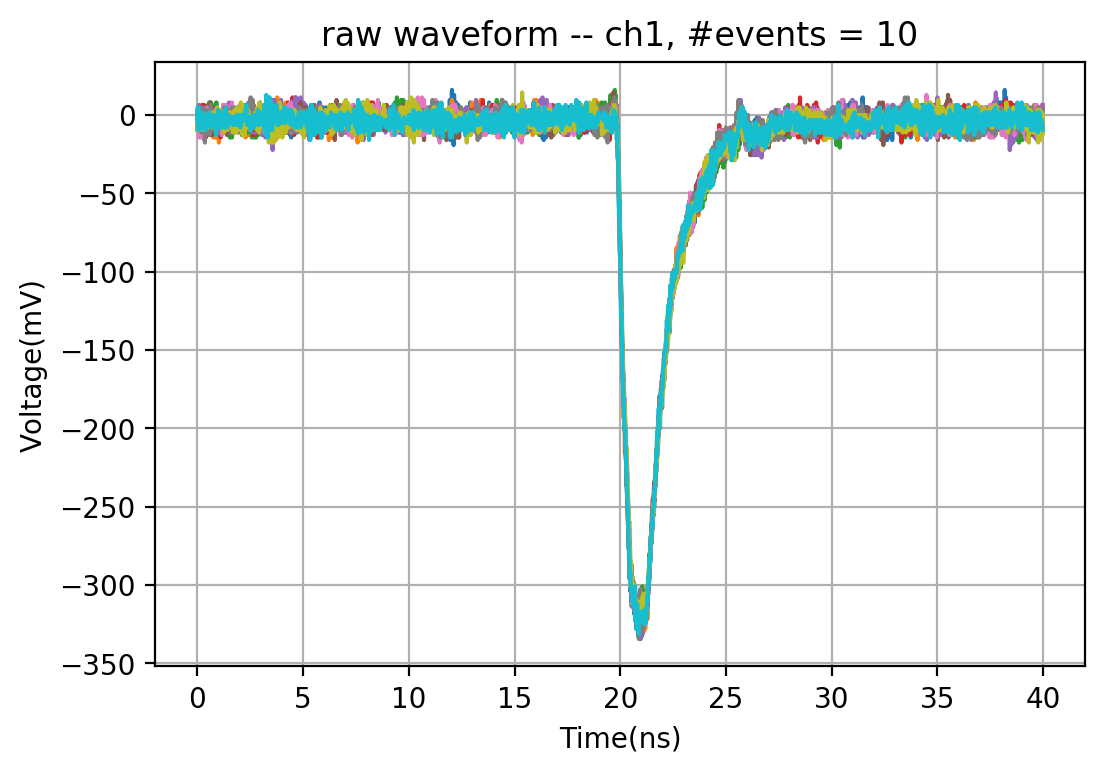

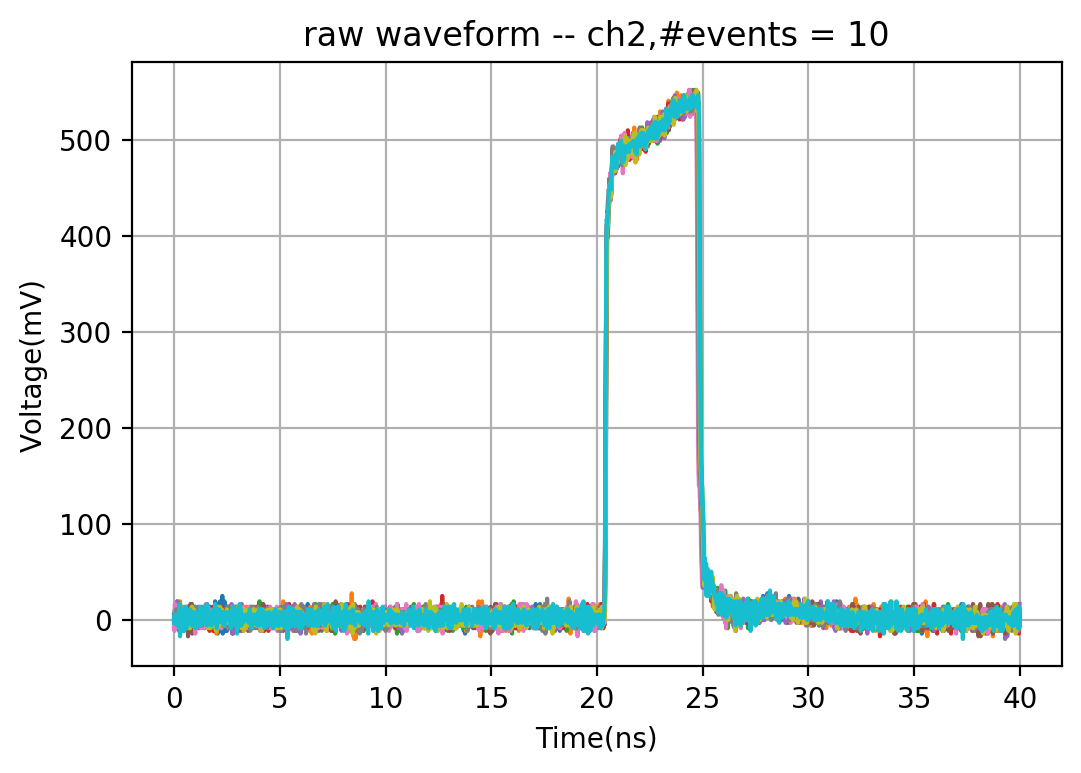

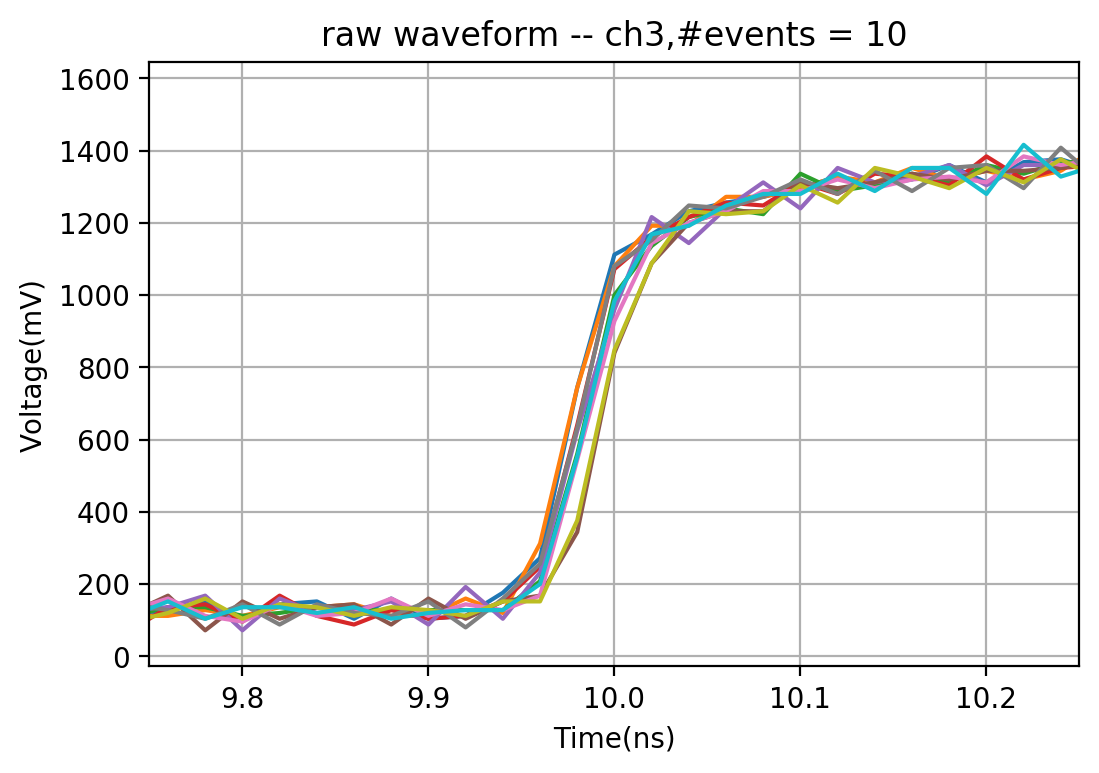

In [3]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'Discriminator_DGHP/15fC/DGHP_DAC331_15fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'



################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
events_t = events_t - 990


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=15,right=20)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [5]:
########################################## DAC 322 #################################
filelist = [
    'Discriminator_DGHP/3fC/DGHP_DAC322_3fC_0.hdf5',
    'Discriminator_DGHP/4fC/DGHP_DAC322_4fC_0.hdf5',
    'Discriminator_DGHP/5fC/DGHP_DAC322_5fC_0.hdf5',
    'Discriminator_DGHP/6fC/DGHP_DAC322_6fC_0.hdf5',
    'Discriminator_DGHP/8fC/DGHP_DAC322_8fC_0.hdf5',
    'Discriminator_DGHP/10fC/DGHP_DAC322_10fC_0.hdf5',
    'Discriminator_DGHP/12fC/DGHP_DAC322_12fC_0.hdf5',
    'Discriminator_DGHP/15fC/DGHP_DAC322_15fC_0.hdf5',
    'Discriminator_DGHP/20fC/DGHP_DAC322_20fC_0.hdf5',
    'Discriminator_DGHP/30fC/DGHP_DAC322_30fC_0.hdf5'
]

charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC216_list = []
mean_t_trigger_DAC216_list = []
std_t_trigger_DAC216_list = []
t_pa_DAC216_list = []
mean_t_pa_DAC216_list = []
std_t_pa_DAC216_list = []
t_discri_le_DAC216_list = []
mean_t_discri_le_DAC216_list = []
std_t_discri_le_DAC216_list = []
t_discri_te_DAC216_list = []
mean_t_discri_te_DAC216_list = []
std_t_discri_te_DAC216_list = []
t_discri_le_notrig_DAC216_list = []
mean_t_discri_le_notrig_DAC216_list = []
std_t_discri_le_notrig_DAC216_list = []
t_discri_te_notrig_DAC216_list = []
mean_t_discri_te_notrig_DAC216_list = []
std_t_discri_te_notrig_DAC216_list = []
ampl_ch1_DAC216_list = []
mean_ampl_DAC216_list = []
std_ampl_DAC216_list = []
q_ch1_DAC216_list = []
mean_q_DAC216_list = []
std_q_DAC216_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC216_list.append(t_trigger)
    mean_t_trigger_DAC216_list.append(mean_t_trigger)
    std_t_trigger_DAC216_list.append(std_t_trigger*1000)
    t_pa_DAC216_list.append(t_pa)
    mean_t_pa_DAC216_list.append(mean_t_pa)
    std_t_pa_DAC216_list.append(std_t_pa*1000)
    t_discri_le_DAC216_list.append(t_discri_le)
    mean_t_discri_le_DAC216_list.append(mean_t_discri_le)
    std_t_discri_le_DAC216_list.append(std_t_discri_le*1000)
    t_discri_te_DAC216_list.append(t_discri_te)
    mean_t_discri_te_DAC216_list.append(mean_t_discri_te)
    std_t_discri_te_DAC216_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC216_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC216_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC216_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC216_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC216_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC216_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC216_list.append(ampl_ch1)
    mean_ampl_DAC216_list.append(mean_ampl)
    std_ampl_DAC216_list.append(std_ampl)
    q_ch1_DAC216_list.append(q_ch1)
    mean_q_DAC216_list.append(mean_q)
    std_q_DAC216_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC216_list is\n',std_t_pa_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC216_list is\n',std_t_discri_le_notrig_DAC216_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC216_list is\n', std_t_discri_te_notrig_DAC216_list)
print('*****************************************************************************************')
print('mean_ampl_DAC216_list is\n', mean_ampl_DAC216_list)
print('*****************************************************************************************')
print('mean_q_DAC216_list is\n', mean_q_DAC216_list)

file_num is 10



npoints at DAC322 / DGHP/3fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.1552



trigger crossing searching is done
trigger mean is 9.994005000000032 ns
trigger std is 0.005880899165944848 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.121544999999575 ns
PA std is 0.030178435595630822 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.85175499999983 ns
discriminator leading std is 0.03325048834227191 ns
discriminator trailing mean is 23.16071000000136 ns
discriminator trailing std is 0.08002746965884559 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.8577499999998 ns
discriminator t_le std (trigger removed) is 0.03261728836061597 ns
discriminator t_te mean (trigger removed) is 13.166705000001329 ns
discriminator t_te std (trigger removed) is 0.07975975159814294 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/3fC/DGHP



npoints at DAC322 / DGHP/4fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.199



trigger crossing searching is done
trigger mean is 9.99219500000003 ns
trigger std is 0.005692712446629474 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.042399999999596 ns
PA std is 0.014725488107357044 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.682264999999866 ns
discriminator leading std is 0.02299771238623071 ns
discriminator trailing mean is 23.72956000000125 ns
discriminator trailing std is 0.1128942266016953 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.690069999999833 ns
discriminator t_le std (trigger removed) is 0.022535418789092914 ns
discriminator t_te mean (trigger removed) is 13.737365000001217 ns
discriminator t_te std (trigger removed) is 0.11288149438679017 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/4fC/DGHP



npoints at DAC322 / DGHP/5fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997



trigger crossing searching is done
trigger mean is 9.992650000000033 ns
trigger std is 0.0053691246958893594 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.004324999999604 ns
PA std is 0.011474727665611398 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.59042499999988 ns
discriminator leading std is 0.017708596076478653 ns
discriminator trailing mean is 24.155085000001165 ns
discriminator trailing std is 0.09076159857008206 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.597774999999853 ns
discriminator t_le std (trigger removed) is 0.016772727118745084 ns
discriminator t_te mean (trigger removed) is 14.16243500000113 ns
discriminator t_te std (trigger removed) is 0.09071904857854679 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/5fC/DGHP



npoints at DAC322 / DGHP/6fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.312



trigger crossing searching is done
trigger mean is 9.993520000000032 ns
trigger std is 0.0060464535059827785 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.982394999999606 ns
PA std is 0.010355625282905775 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.530899999999896 ns
discriminator leading std is 0.016009059934921164 ns
discriminator trailing mean is 24.439645000001107 ns
discriminator trailing std is 0.09108319809381256 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.537379999999862 ns
discriminator t_le std (trigger removed) is 0.014840336923396064 ns
discriminator t_te mean (trigger removed) is 14.446125000001077 ns
discriminator t_te std (trigger removed) is 0.09070093370520899 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/6fC/DGHP



npoints at DAC322 / DGHP/8fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.406



trigger crossing searching is done
trigger mean is 9.992810000000032 ns
trigger std is 0.005709982486839184 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.953444999999608 ns
PA std is 0.009762529129275983 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.46360499999991 ns
discriminator leading std is 0.012634436077638625 ns
discriminator trailing mean is 24.834525000001026 ns
discriminator trailing std is 0.08290626861098782 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.470794999999878 ns
discriminator t_le std (trigger removed) is 0.011377300866196224 ns
discriminator t_te mean (trigger removed) is 14.841715000000997 ns
discriminator t_te std (trigger removed) is 0.08245170571308565 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/8fC/DGHP



npoints at DAC322 / DGHP/10fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.505



trigger crossing searching is done
trigger mean is 9.992510000000031 ns
trigger std is 0.005431381039846976 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.935934999999613 ns
PA std is 0.010077240445675572 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.419814999999915 ns
discriminator leading std is 0.011394769633474314 ns
discriminator trailing mean is 25.074120000000978 ns
discriminator trailing std is 0.07305392255038655 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.427304999999887 ns
discriminator t_le std (trigger removed) is 0.010274335744950125 ns
discriminator t_te mean (trigger removed) is 15.08161000000095 ns
discriminator t_te std (trigger removed) is 0.07298943690697912 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/10fC/DGHP



npoints at DAC322 / DGHP/12fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.606



trigger crossing searching is done
trigger mean is 9.99285500000003 ns
trigger std is 0.00540592036567402 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.923719999999616 ns
PA std is 0.010008076738312919 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.39410499999992 ns
discriminator leading std is 0.010877682427794669 ns
discriminator trailing mean is 25.238140000000946 ns
discriminator trailing std is 0.06539182211865868 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.40124999999989 ns
discriminator t_le std (trigger removed) is 0.00934812815487489 ns
discriminator t_te mean (trigger removed) is 15.245285000000917 ns
discriminator t_te std (trigger removed) is 0.06507990300390983 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/12fC/DGHP



npoints at DAC322 / DGHP/15fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.756



trigger crossing searching is done
trigger mean is 9.993340000000032 ns
trigger std is 0.005660777331781389 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.90851499999962 ns
PA std is 0.010562659466249758 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.367834999999925 ns
discriminator leading std is 0.010150752435162579 ns
discriminator trailing mean is 25.38902000000092 ns
discriminator trailing std is 0.05789075573870725 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.374494999999895 ns
discriminator t_le std (trigger removed) is 0.008277679324543315 ns
discriminator t_te mean (trigger removed) is 15.395680000000887 ns
discriminator t_te std (trigger removed) is 0.057382380571031386 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/15fC/DGHP



npoints at DAC322 / DGHP/20fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.9199999999999999



trigger crossing searching is done
trigger mean is 9.98947500000003 ns
trigger std is 0.006248949911786156 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.898999999999624 ns
PA std is 0.010655984234220452 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.33759499999993 ns
discriminator leading std is 0.009504786951845057 ns
discriminator trailing mean is 25.501930000000897 ns
discriminator trailing std is 0.058183546643348 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.348119999999904 ns
discriminator t_le std (trigger removed) is 0.007874998412696928 ns
discriminator t_te mean (trigger removed) is 15.512455000000864 ns
discriminator t_te std (trigger removed) is 0.05798748119205272 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/20fC/DGHP



npoints at DAC322 / DGHP/30fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.43



trigger crossing searching is done
trigger mean is 9.993220000000033 ns
trigger std is 0.0058293738943398215 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.413139999999714 ns
PA std is 0.7872997144669579 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.60448999999988 ns
discriminator leading std is 0.009213571511632513 ns
discriminator trailing mean is 25.964115000000806 ns
discriminator trailing std is 0.047981160625802745 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.611269999999848 ns
discriminator t_le std (trigger removed) is 0.007279223859724308 ns
discriminator t_te mean (trigger removed) is 15.970895000000773 ns
discriminator t_te std (trigger removed) is 0.04784165522846274 ns
**************************************************************************************
calculate charge and amplitude DAC322 / DGHP/30fC/DGHP

*****************************************************************************************
*****************************************************************************************
********************************************************************

In [4]:
########################################## DAC 222 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC222_3fC_0.hdf5',
    'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC222_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC222_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC222_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC222_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC222_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC222_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC222_30fC_0.hdf5'
]

charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC222_list = []
mean_t_trigger_DAC222_list = []
std_t_trigger_DAC222_list = []
t_pa_DAC222_list = []
mean_t_pa_DAC222_list = []
std_t_pa_DAC222_list = []
t_discri_le_DAC222_list = []
mean_t_discri_le_DAC222_list = []
std_t_discri_le_DAC222_list = []
t_discri_te_DAC222_list = []
mean_t_discri_te_DAC222_list = []
std_t_discri_te_DAC222_list = []
t_discri_le_notrig_DAC222_list = []
mean_t_discri_le_notrig_DAC222_list = []
std_t_discri_le_notrig_DAC222_list = []
t_discri_te_notrig_DAC222_list = []
mean_t_discri_te_notrig_DAC222_list = []
std_t_discri_te_notrig_DAC222_list = []
ampl_ch1_DAC222_list = []
mean_ampl_DAC222_list = []
std_ampl_DAC222_list = []
q_ch1_DAC222_list = []
mean_q_DAC222_list = []
std_q_DAC222_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC222_list.append(t_trigger)
    mean_t_trigger_DAC222_list.append(mean_t_trigger)
    std_t_trigger_DAC222_list.append(std_t_trigger*1000)
    t_pa_DAC222_list.append(t_pa)
    mean_t_pa_DAC222_list.append(mean_t_pa)
    std_t_pa_DAC222_list.append(std_t_pa*1000)
    t_discri_le_DAC222_list.append(t_discri_le)
    mean_t_discri_le_DAC222_list.append(mean_t_discri_le)
    std_t_discri_le_DAC222_list.append(std_t_discri_le*1000)
    t_discri_te_DAC222_list.append(t_discri_te)
    mean_t_discri_te_DAC222_list.append(mean_t_discri_te)
    std_t_discri_te_DAC222_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC222_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC222_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC222_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC222_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC222_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC222_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC222_list.append(ampl_ch1)
    mean_ampl_DAC222_list.append(mean_ampl)
    std_ampl_DAC222_list.append(std_ampl)
    q_ch1_DAC222_list.append(q_ch1)
    mean_q_DAC222_list.append(mean_q)
    std_q_DAC222_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC222_list is\n',std_t_pa_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC222_list is\n',std_t_discri_le_notrig_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC222_list is\n', std_t_discri_te_notrig_DAC222_list)
print('*****************************************************************************************')
print('mean_ampl_DAC222_list is\n', mean_ampl_DAC222_list)
print('*****************************************************************************************')
print('mean_q_DAC222_list is\n', mean_q_DAC222_list)

file_num is 9



npoints at 4fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.2



trigger crossing searching is done
trigger mean is 9.992375000000031 ns
trigger std is 0.0056598917834186566 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.271909999999547 ns
PA std is 0.035048564877887815 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 21.126319999999772 ns
discriminator leading std is 0.04270723123780415 ns
discriminator trailing mean is 23.654385000001263 ns
discriminator trailing std is 0.09307011751897896 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.133944999999745 ns
discriminator t_le std (trigger removed) is 0.04226478409975955 ns
discriminator t_te mean (trigger removed) is 13.662010000001231 ns
discriminator t_te std (trigger removed) is 0.093108323473235 ns
**************************************************************************************
calculate charge and amplitude 4fC / DAC222



npoints at 5fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.252



trigger crossing searching is done
trigger mean is 9.992870000000032 ns
trigger std is 0.005649168080346874 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.147979999999574 ns
PA std is 0.030067750165245825 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.932409999999813 ns
discriminator leading std is 0.028897956675164208 ns
discriminator trailing mean is 24.17314500000116 ns
discriminator trailing std is 0.09269996750267273 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.939539999999784 ns
discriminator t_le std (trigger removed) is 0.02833616770136146 ns
discriminator t_te mean (trigger removed) is 14.18027500000113 ns
discriminator t_te std (trigger removed) is 0.0924764801179013 ns
**************************************************************************************
calculate charge and amplitude 5fC / DAC222



npoints at 6fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.30560000000000004



trigger crossing searching is done
trigger mean is 9.992890000000033 ns
trigger std is 0.005691915319117996 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.085509999999587 ns
PA std is 0.019632623360107702 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.81748999999984 ns
discriminator leading std is 0.02235284993014987 ns
discriminator trailing mean is 24.53109000000109 ns
discriminator trailing std is 0.07963831929415309 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.824599999999807 ns
discriminator t_le std (trigger removed) is 0.02160300904966283 ns
discriminator t_te mean (trigger removed) is 14.538200000001057 ns
discriminator t_te std (trigger removed) is 0.07938929398853153 ns
**************************************************************************************
calculate charge and amplitude 6fC / DAC222



npoints at 8fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.402



trigger crossing searching is done
trigger mean is 9.992485000000032 ns
trigger std is 0.005563252196333515 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.028534999999597 ns
PA std is 0.014218958295174774 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.685224999999864 ns
discriminator leading std is 0.017674115960915154 ns
discriminator trailing mean is 24.991725000000994 ns
discriminator trailing std is 0.06905902819326451 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.692739999999832 ns
discriminator t_le std (trigger removed) is 0.016700071856129487 ns
discriminator t_te mean (trigger removed) is 14.999240000000965 ns
discriminator t_te std (trigger removed) is 0.06901791361666994 ns
**************************************************************************************
calculate charge and amplitude 8fC / DAC222



npoints at 10fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.505



trigger crossing searching is done
trigger mean is 9.992590000000032 ns
trigger std is 0.005490163931979574 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.990369999999608 ns
PA std is 0.011898029248574896 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.606999999999882 ns
discriminator leading std is 0.015119523802021976 ns
discriminator trailing mean is 25.26299500000094 ns
discriminator trailing std is 0.0625068394257656 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.61440999999985 ns
discriminator t_le std (trigger removed) is 0.01396251768127515 ns
discriminator t_te mean (trigger removed) is 15.270405000000911 ns
discriminator t_te std (trigger removed) is 0.062309798386758215 ns
**************************************************************************************
calculate charge and amplitude 10fC / DAC222



npoints at 12fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.615



trigger crossing searching is done
trigger mean is 9.993550000000033 ns
trigger std is 0.0057006578567749665 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.970604999999612 ns
PA std is 0.012145327290770773 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.55470999999989 ns
discriminator leading std is 0.01327275028017667 ns
discriminator trailing mean is 25.457135000000903 ns
discriminator trailing std is 0.056304678091600335 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.561159999999857 ns
discriminator t_le std (trigger removed) is 0.012108030393087998 ns
discriminator t_te mean (trigger removed) is 15.463585000000872 ns
discriminator t_te std (trigger removed) is 0.055759508381967936 ns
**************************************************************************************
calculate charge and amplitude 12fC / DAC222



npoints at 15fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.756



trigger crossing searching is done
trigger mean is 9.993105000000032 ns
trigger std is 0.005790852700596906 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.95124999999961 ns
PA std is 0.012138265938755064 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.5005499999999 ns
discriminator leading std is 0.01266876079180344 ns
discriminator trailing mean is 25.655195000000866 ns
discriminator trailing std is 0.054291223738269404 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.50744499999987 ns
discriminator t_le std (trigger removed) is 0.011495519779459704 ns
discriminator t_te mean (trigger removed) is 15.662090000000834 ns
discriminator t_te std (trigger removed) is 0.05388860640245618 ns
**************************************************************************************
calculate charge and amplitude 15fC / DAC222



npoints at 20fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.92



trigger crossing searching is done
trigger mean is 9.989555000000031 ns
trigger std is 0.005998080943102656 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.921284999999617 ns
PA std is 0.01260649733272239 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.447869999999917 ns
discriminator leading std is 0.011500569551111258 ns
discriminator trailing mean is 25.83238000000083 ns
discriminator trailing std is 0.05354097122763892 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.45831499999988 ns
discriminator t_le std (trigger removed) is 0.009761443284676796 ns
discriminator t_te mean (trigger removed) is 15.842825000000799 ns
discriminator t_te std (trigger removed) is 0.053476577816824376 ns
**************************************************************************************
calculate charge and amplitude 20fC / DAC222



npoints at 30fC / DAC222 is 2000
events_t is 1000
threshold of trigger is 0.434



trigger crossing searching is done
trigger mean is 9.993730000000033 ns
trigger std is 0.00582126274961117 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.187654999999562 ns
PA std is 0.10728362398332479 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.692839999999865 ns
discriminator leading std is 0.009728021381553514 ns
discriminator trailing mean is 26.32892500000073 ns
discriminator trailing std is 0.04724742717862119 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.699109999999832 ns
discriminator t_le std (trigger removed) is 0.008225442237349645 ns
discriminator t_te mean (trigger removed) is 16.3351950000007 ns
discriminator t_te std (trigger removed) is 0.04689922147540541 ns
**************************************************************************************
calculate charge and amplitude 30fC / DAC222

*****************************************************************************************
*****************************************************************************************
*********************************************************************************

In [5]:
########################################## DAC 232 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC228_3fC_0.hdf5',
#     'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC228_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC228_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC228_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC228_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC228_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC228_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC228_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC228_30fC_0.hdf5'
]

charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC228_5fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC228_6fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC228_list = []
mean_t_trigger_DAC228_list = []
std_t_trigger_DAC228_list = []
t_pa_DAC228_list = []
mean_t_pa_DAC228_list = []
std_t_pa_DAC228_list = []
t_discri_le_DAC228_list = []
mean_t_discri_le_DAC228_list = []
std_t_discri_le_DAC228_list = []
t_discri_te_DAC228_list = []
mean_t_discri_te_DAC228_list = []
std_t_discri_te_DAC228_list = []
t_discri_le_notrig_DAC228_list = []
mean_t_discri_le_notrig_DAC228_list = []
std_t_discri_le_notrig_DAC228_list = []
t_discri_te_notrig_DAC228_list = []
mean_t_discri_te_notrig_DAC228_list = []
std_t_discri_te_notrig_DAC228_list = []
ampl_ch1_DAC228_list = []
mean_ampl_DAC228_list = []
std_ampl_DAC228_list = []
q_ch1_DAC228_list = []
mean_q_DAC228_list = []
std_q_DAC228_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC228_list.append(t_trigger)
    mean_t_trigger_DAC228_list.append(mean_t_trigger)
    std_t_trigger_DAC228_list.append(std_t_trigger*1000)
    t_pa_DAC228_list.append(t_pa)
    mean_t_pa_DAC228_list.append(mean_t_pa)
    std_t_pa_DAC228_list.append(std_t_pa*1000)
    t_discri_le_DAC228_list.append(t_discri_le)
    mean_t_discri_le_DAC228_list.append(mean_t_discri_le)
    std_t_discri_le_DAC228_list.append(std_t_discri_le*1000)
    t_discri_te_DAC228_list.append(t_discri_te)
    mean_t_discri_te_DAC228_list.append(mean_t_discri_te)
    std_t_discri_te_DAC228_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC228_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC228_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC228_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC228_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC228_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC228_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC228_list.append(ampl_ch1)
    mean_ampl_DAC228_list.append(mean_ampl)
    std_ampl_DAC228_list.append(std_ampl)
    q_ch1_DAC228_list.append(q_ch1)
    mean_q_DAC228_list.append(mean_q)
    std_q_DAC228_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC228_list is\n',std_t_pa_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC228_list is\n',std_t_discri_le_notrig_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC228_list is\n', std_t_discri_te_notrig_DAC228_list)
print('*****************************************************************************************')
print('mean_ampl_DAC228_list is\n', mean_ampl_DAC228_list)
print('*****************************************************************************************')
print('mean_q_DAC228_list is\n', mean_q_DAC228_list)

file_num is 8



npoints at 5fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.2531999999999999



trigger crossing searching is done
trigger mean is 9.993265000000031 ns
trigger std is 0.005728418193533906 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.151634999999573 ns
PA std is 0.030907956499898533 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 21.244904999999754 ns
discriminator leading std is 0.040256253861969765 ns
discriminator trailing mean is 23.336865000001325 ns
discriminator trailing std is 0.07300579959837354 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.251639999999721 ns
discriminator t_le std (trigger removed) is 0.03977009429206031 ns
discriminator t_te mean (trigger removed) is 13.343600000001295 ns
discriminator t_te std (trigger removed) is 0.0726907146752451 ns
**************************************************************************************
calculate charge and amplitude 5fC / DAC228



npoints at 6fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.3088



trigger crossing searching is done
trigger mean is 9.993335000000032 ns
trigger std is 0.005861124038954537 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.084454999999583 ns
PA std is 0.019252999117016875 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 21.038154999999794 ns
discriminator leading std is 0.02649096025061607 ns
discriminator trailing mean is 23.728775000001246 ns
discriminator trailing std is 0.06458888739557556 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.044819999999763 ns
discriminator t_le std (trigger removed) is 0.025770479234964463 ns
discriminator t_te mean (trigger removed) is 13.735440000001217 ns
discriminator t_te std (trigger removed) is 0.0646289903990334 ns
**************************************************************************************
calculate charge and amplitude 6fC / DAC228



npoints at 8fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.40800000000000003



trigger crossing searching is done
trigger mean is 9.993120000000031 ns
trigger std is 0.005640531889814111 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.029564999999597 ns
PA std is 0.013891932011060348 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.83773999999983 ns
discriminator leading std is 0.018410388371782525 ns
discriminator trailing mean is 24.344050000001122 ns
discriminator trailing std is 0.05759945746271123 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.844619999999802 ns
discriminator t_le std (trigger removed) is 0.01758708617138944 ns
discriminator t_te mean (trigger removed) is 14.350930000001096 ns
discriminator t_te std (trigger removed) is 0.0575737361997525 ns
**************************************************************************************
calculate charge and amplitude 8fC / DAC228



npoints at 10fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.505



trigger crossing searching is done
trigger mean is 9.992810000000032 ns
trigger std is 0.005554628700463213 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.98991499999961 ns
PA std is 0.012307224504328331 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.72883999999986 ns
discriminator leading std is 0.014230404070156244 ns
discriminator trailing mean is 24.684875000001053 ns
discriminator trailing std is 0.05260237043136839 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.736029999999824 ns
discriminator t_le std (trigger removed) is 0.012937893955351925 ns
discriminator t_te mean (trigger removed) is 14.692065000001026 ns
discriminator t_te std (trigger removed) is 0.05233364859245829 ns
**************************************************************************************
calculate charge and amplitude 10fC / DAC228



npoints at 12fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.603



trigger crossing searching is done
trigger mean is 9.99247500000003 ns
trigger std is 0.005463458153954263 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.97030499999961 ns
PA std is 0.011896721186946582 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.659209999999863 ns
discriminator leading std is 0.012626396952414277 ns
discriminator trailing mean is 24.93555500000101 ns
discriminator trailing std is 0.04861652985352882 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.66673499999984 ns
discriminator t_le std (trigger removed) is 0.011500642373361078 ns
discriminator t_te mean (trigger removed) is 14.943080000000977 ns
discriminator t_te std (trigger removed) is 0.04811770568095566 ns
**************************************************************************************
calculate charge and amplitude 12fC / DAC228



npoints at 15fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.752



trigger crossing searching is done
trigger mean is 9.992725000000032 ns
trigger std is 0.00543133270938259 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.95145499999961 ns
PA std is 0.012200736658085068 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.59436999999988 ns
discriminator leading std is 0.011128930766248423 ns
discriminator trailing mean is 25.18448000000096 ns
discriminator trailing std is 0.041831562246697214 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.601644999999852 ns
discriminator t_le std (trigger removed) is 0.009781051835051402 ns
discriminator t_te mean (trigger removed) is 15.191755000000926 ns
discriminator t_te std (trigger removed) is 0.0411854947159715 ns
**************************************************************************************
calculate charge and amplitude 15fC / DAC228



npoints at 20fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.9249999999999999



trigger crossing searching is done
trigger mean is 9.98971500000003 ns
trigger std is 0.005919778289768203 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 19.920599999999617 ns
PA std is 0.01245552086425687 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.525969999999894 ns
discriminator leading std is 0.009851857692839527 ns
discriminator trailing mean is 25.394565000000917 ns
discriminator trailing std is 0.03586552348704098 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.536254999999864 ns
discriminator t_le std (trigger removed) is 0.008127113571248722 ns
discriminator t_te mean (trigger removed) is 15.404850000000886 ns
discriminator t_te std (trigger removed) is 0.035372694271139454 ns
**************************************************************************************
calculate charge and amplitude 20fC / DAC228



npoints at 30fC / DAC228 is 2000
events_t is 1000
threshold of trigger is 0.432



trigger crossing searching is done
trigger mean is 9.99333000000003 ns
trigger std is 0.005801818680380362 ns
**************************************************************************************
threshold of PA is -0.03



t searching is done
PA mean is 20.187854999999562 ns
PA std is 0.09712478558532958 ns
**************************************************************************************



discriminator crossing searching is done
discriminator leading mean is 20.75528499999985 ns
discriminator leading std is 0.009151162494457559 ns
discriminator trailing mean is 25.954475000000805 ns
discriminator trailing std is 0.03301210952059208 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.76195499999982 ns
discriminator t_le std (trigger removed) is 0.006910352740633446 ns
discriminator t_te mean (trigger removed) is 15.961145000000773 ns
discriminator t_te std (trigger removed) is 0.032352959292769184 ns
**************************************************************************************
calculate charge and amplitude 30fC / DAC228

*****************************************************************************************
*****************************************************************************************
*******************************************************************************

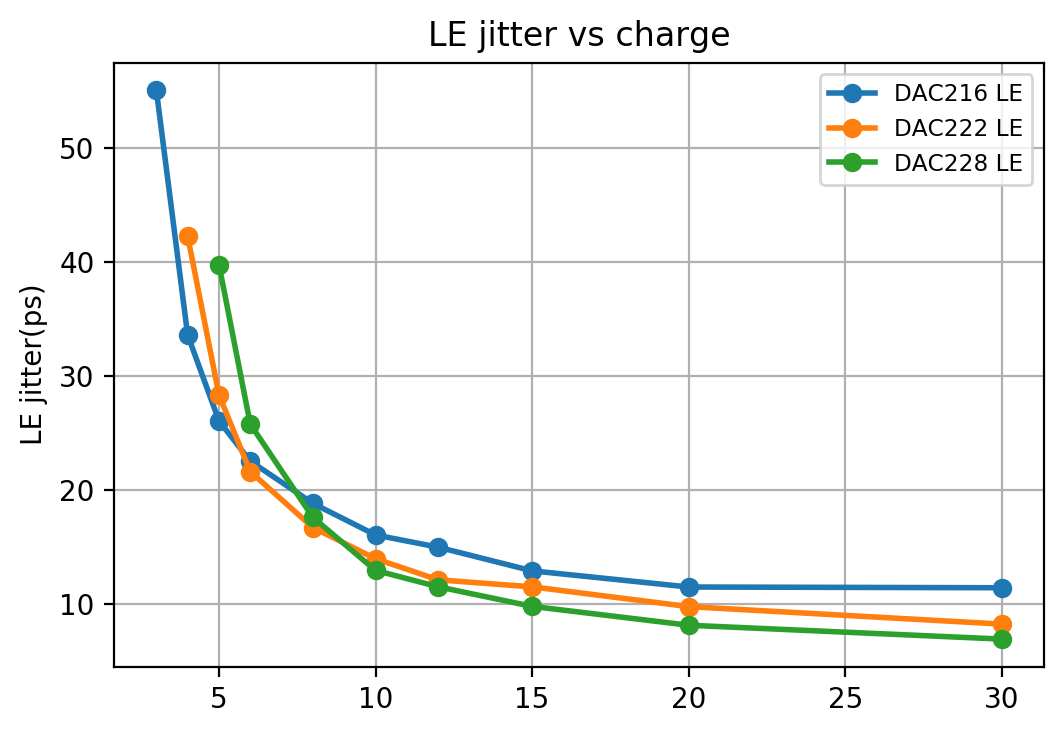

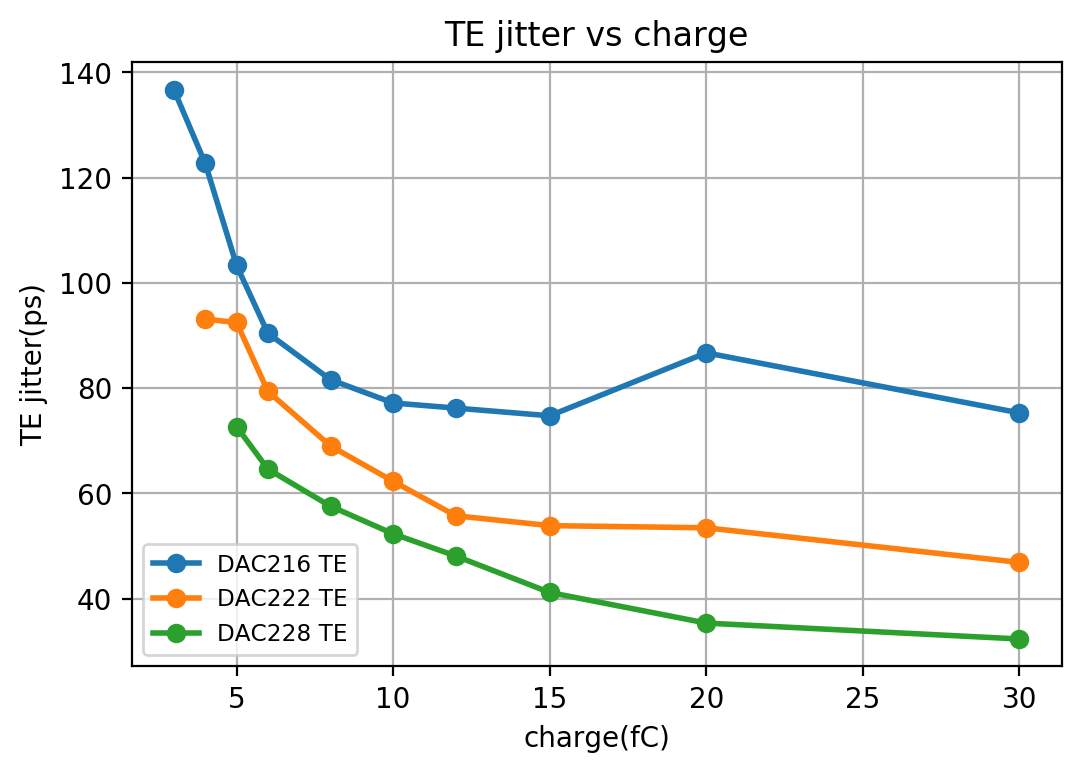

[0.278179213202591, 0.26022666663235217, 0.27362568782950936, 0.2678706308966126, 0.27187846186284337, 0.26562175266745125, 0.29497851431912325, 0.29514377375613127]


In [9]:
############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]


fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC216_list, std_t_discri_le_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 LE")
ax1.plot(charge_DAC222_list, std_t_discri_le_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 LE")
ax1.plot(charge_DAC228_list, std_t_discri_le_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')


ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC216_list, std_t_discri_te_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 TE")
ax2.plot(charge_DAC222_list, std_t_discri_te_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 TE")
ax2.plot(charge_DAC228_list, std_t_discri_te_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 TE")

ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()


print(std_q_DAC228_list)

In [25]:
############################### plot to pdf  ######################################
path_plot = './'
pp = PdfPages(path_plot+"plots_DGHP"+".pdf")

charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

######### plot text box #####
fig0, ax0 = plt.subplots(dpi=200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax0.set_xlim(left=0,right=50)
ax0.set_ylim(bottom=0,top=50)
pp.savefig(fig0)
plt.close(fig0)

######### plot charge  ######
fig1, ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
       title='measured charge vs input charge')

# major_ticks_y = np.arange(0, 40, 5)
# minor_ticks_y = np.arange(0, 40, 1)

# major_ticks_x = np.arange(0, 35, 5)
# minor_ticks_x = np.arange(0, 35, 1)

# ax1.set_xticks(major_ticks_x)
# ax1.set_xticks(minor_ticks_x, minor=True)
# ax1.set_yticks(major_ticks_y)
# ax1.set_yticks(minor_ticks_y, minor=True)

# for i,j in zip(charge_DAC228_list,mean_q_DAC228_list):
#     ax1.annotate(str(j),xy=(i,j))

ax1.grid(which='both')
pp.savefig(fig1)
plt.close(fig1)

pp.close()